In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.hydro import advection_dt
from fvhoe.initial_conditions import shock_tube_2d
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 32
p = 0

P_blast = (1.4 - 1) * 0.25 * N**2

solver = EulerSolver(
    w0=partial(
        shock_tube_2d,
        center=(0.5 / N, 0.5 / N, 0),
        radius=0,
        rho_in_out=(1, 1),
        P_in_out=(P_blast, 1e-5),
    ),
    fv_ic=True,
    gamma=1.4,
    bc=BoundaryCondition(
        x={
            "rho": "reflective",
            "mx": "negative-reflective",
            "my": "reflective",
            "mz": "periodic",
            "E": "reflective",
        },
        y={
            "rho": "reflective",
            "mx": "reflective",
            "my": "negative-reflective",
            "mz": "periodic",
            "E": "reflective",
        },
    ),
    CFL=0.8,
    nx=N,
    ny=N,
    px=p,
    py=p,
    riemann_solver="llf",
    a_posteriori_slope_limiting=True,
    slope_limiter="minmod",
    all_floors=True,
    cupy=False,
)

yo


In [3]:
solver.rkorder(0.3, save_snapshots=False)

100%|██████████| 0.3/0.3 [00:00]                  


t=0.30, x=[0.02, 0.98], y=[0.02, 0.98], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.30, x=[0.02, 0.98], y=[0.02, 0.98], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.30, x=[0.02, 0.98], y=[0.02, 0.98], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.30, x=[0.02, 0.98], y=[0.02, 0.98], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0.5, 0, '$x$')

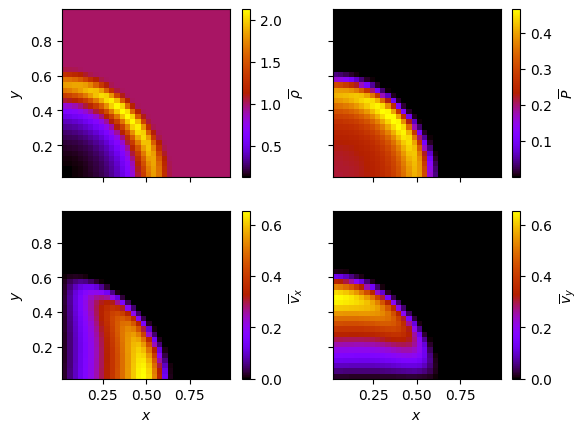

In [4]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

t = 1

for var, label, idx in zip(
    ["rho", "P", "vx", "vy"],
    [r"$\overline{\rho}$", r"$\overline{P}$", r"$\overline{v}_x$", r"$\overline{v}_y$"],
    [(0, 0), (0, 1), (1, 0), (1, 1)],
):
    im = solver.plot_2d_slice(ax[idx], t=1, param=var, cmap="gnuplot", z=0.5)
    fig.colorbar(im, ax=ax[idx], label=label)

ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")